In [2]:
!pip install kagglehub

import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download("shivamb/fashion-clothing-products-catalog")

dataset_path = f'{path}/myntra_products_catalog.csv'
df = pd.read_csv(dataset_path)

# Informações Básicas e Estatísticas 📊

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
 3   Gender        12491 non-null  object
 4   Price (INR)   12491 non-null  int64 
 5   NumImages     12491 non-null  int64 
 6   Description   12491 non-null  object
 7   PrimaryColor  11597 non-null  object
dtypes: int64(3), object(5)
memory usage: 780.8+ KB


In [5]:
df.describe()

,ProductID,Price (INR),NumImages
count,1.249100e+04,12491.000000,12491.000000
mean,9.917160e+06,1452.660956,4.913698
std,1.438006e+06,2118.503976,1.092333
min,1.012060e+05,90.000000,1.000000
25%,1.006215e+07,649.000000,5.000000
50%,1.015463e+07,920.000000,5.000000
75%,1.021565e+07,1499.000000,5.000000
max,1.027514e+07,63090.000000,10.000000


In [6]:
df.isnull().sum()

,0
ProductID,0
ProductName,0
ProductBrand,0
Gender,0
Price (INR),0
NumImages,0
Description,0
PrimaryColor,894


**📊 Resumo da Estrutura do Dataset:** O dataset contém 12.491 entradas e 8 colunas. Observamos que a maioria das colunas não possui valores nulos, exceto PrimaryColor, que apresenta 894 valores ausentes. ❌ As colunas estão divididas em tipos de dados int64 para variáveis numéricas (ProductID, Price (INR), NumImages) e object para variáveis categóricas e textuais.

**📈 Estatísticas Descritivas das Colunas Numéricas:**

ProductID: Apresenta uma grande faixa de valores, mas não é muito relevante para análise, pois é apenas um identificador único de cada produto. 🆔
Price (INR): O preço dos produtos varia de 90 a 63.090 INR, com uma média de 1.452 INR. 💰 Esse desvio padrão elevado (2.118) indica uma variabilidade significativa nos preços.
NumImages: O número médio de imagens é 4,9, e a maioria dos produtos possui entre 4 e 5 imagens. 📷 Essas estatísticas ajudam a entender a variação nos preços e no número de imagens, que podem ser úteis para identificar outliers e segmentar os dados.
📉 Contagem de Valores Ausentes: Observamos que apenas a coluna PrimaryColor possui valores ausentes, totalizando 894 entradas nulas. Como PrimaryColor é uma variável categórica, podemos tratar esses valores ausentes com técnicas como preenchimento por moda ou atribuição de uma categoria 'Unknown'. ❓ Não há valores nulos em outras colunas, o que facilita a análise.

# 📊 Análise Univariada: Colunas Categóricas
Distribuições das variáveis individuais, incluindo colunas categóricas e numéricas. 🔍

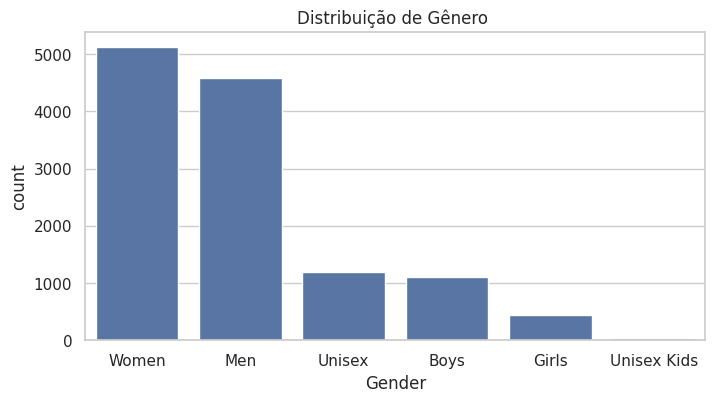

In [10]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Gender", order=df['Gender'].value_counts().index)
plt.title("Distribuição de Gênero ")
plt.show()


**🚻 Distribuição de Gênero:**

O gráfico de barras mostra a contagem de produtos classificados por gênero. As categorias "Women" e "Men" dominam, com uma quantidade muito maior de produtos em comparação com as outras categorias, como "Unisex", "Boys", "Girls", e "Unisex Kids". 📊 Isso indica que a maioria dos produtos deste catálogo é voltada para o público adulto feminino e masculino. 👩‍🦰👨‍🦱 Esse desequilíbrio pode ser relevante ao criar um sistema de recomendação que leve em conta o gênero dos usuários. 🛍️

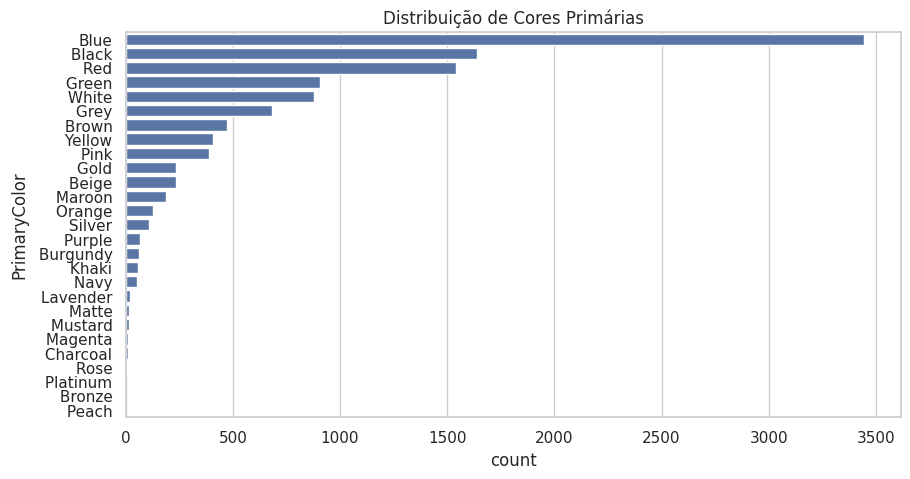

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="PrimaryColor", order=df['PrimaryColor'].value_counts().index)
plt.title("Distribuição de Cores Primárias")
plt.show()

**🎨 Distribuição de Cores Primárias:**

O gráfico de barras das cores primárias revela que as cores "Blue", "Black", e "Red" são as mais comuns, seguidas de "Green", "White" e "Grey". 🌈 Já cores como "Peach", "Bronze" e "Platinum" aparecem com menor frequência. 📉 Isso pode indicar preferências de cor no portfólio da loja e pode ajudar a identificar quais cores têm maior ou menor variedade, o que pode ser útil na recomendação de produtos ou análise de inventário. 🛒

# 📊 Análise Univariada: Colunas Numéricas 🔢

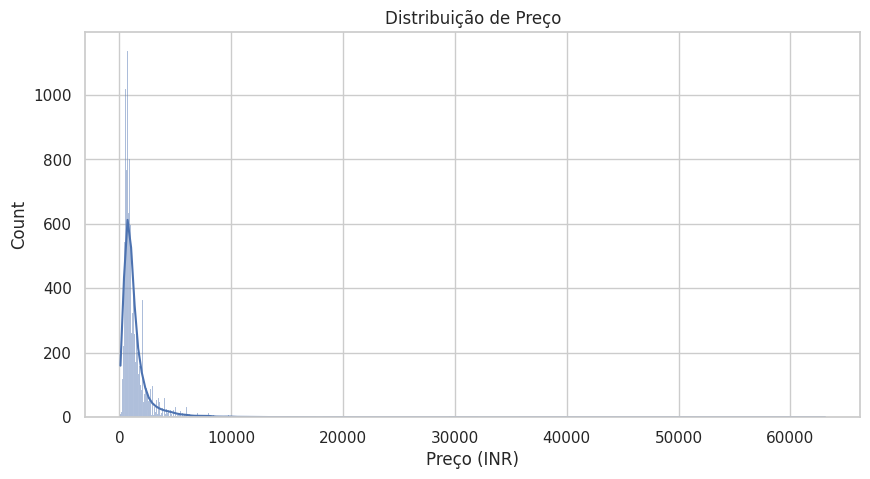

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Price (INR)'], kde=True)
plt.title("Distribuição de Preço")
plt.xlabel("Preço (INR)")
plt.show()

**💰 Distribuição de Preço:** O gráfico de distribuição de preço (histograma) mostra que a maioria dos produtos está em uma faixa de preço mais baixa, com uma concentração significativa abaixo de 10.000 INR. 📉 Há uma longa "cauda" à direita, indicando a presença de produtos de luxo ou com preços mais elevados. 👜 Esta distribuição pode sugerir uma gama ampla de preços e, ao mesmo tempo, uma tendência de foco em produtos acessíveis. 🛍️ Este ponto pode ser útil para segmentar produtos por faixa de preço e adaptar as recomendações conforme o perfil de gasto dos usuários. 📊

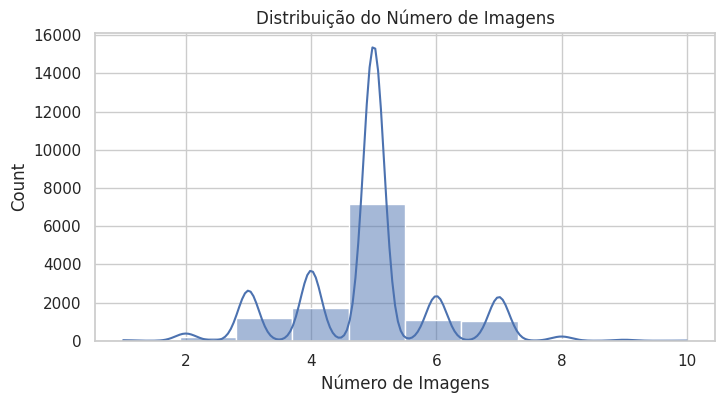

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(df['NumImages'], bins=10, kde=True)
plt.title("Distribuição do Número de Imagens")
plt.xlabel("Número de Imagens")
plt.show()

📈 **Distribuição do Número de Imagens**

O histograma acima mostra a distribuição do número de imagens no dataset. Observa-se que o valor mais comum de imagens é 5, com vários outros picos indicando diferentes frequências. 📊

# 📊 Análise Bivariada
Relação entre variáveis categóricas e numéricas. 🔍

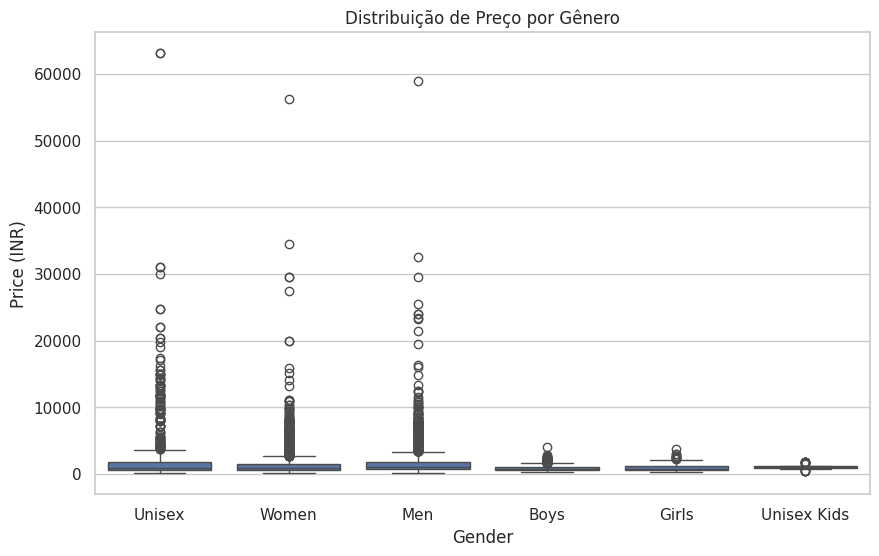

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Gender", y="Price (INR)")
plt.title("Distribuição de Preço por Gênero")
plt.show()

**Observações**

👫 Unisex, Women, Men: Estas categorias apresentam uma ampla gama de preços, com muitos outliers acima de 10.000 INR, chegando até 60.000 INR. 💸

👦👧 Boys, Girls, Unisex Kids: Estas categorias têm preços significativamente mais baixos, com poucos outliers e a maioria dos preços concentrados em uma faixa mais baixa. 📉

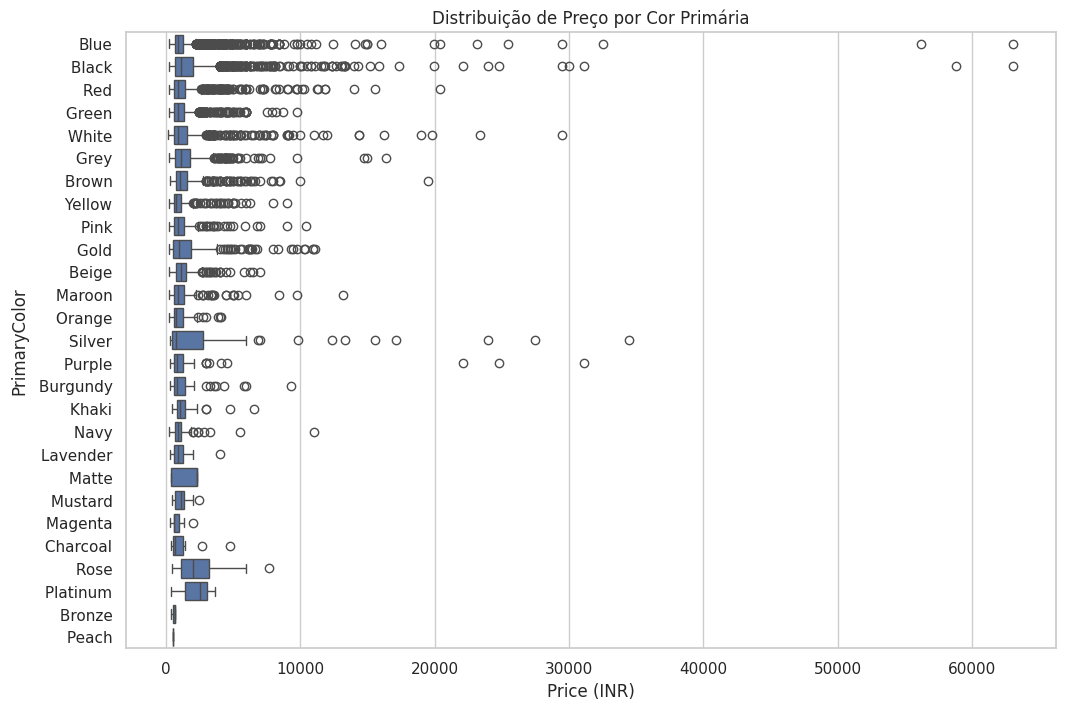

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y="PrimaryColor", x="Price (INR)", order=df['PrimaryColor'].value_counts().index)
plt.title("Distribuição de Preço por Cor Primária")
plt.show()

# Resumo das Distribuições 📊
Distribuição por Gênero 👕👖:
Produtos destinados a Unisex, Mulheres e Homens mostram uma faixa de preço mais ampla e diversos outliers, o que indica a presença de produtos de luxo ou alta demanda.
Já os produtos para Meninos, Meninas e Unisex Kids apresentam preços mais baixos e menor variação, sugerindo menos diversidade ou preços mais controlados nesse mercado.

Distribuição por Cor Primária 🎨:
Cores como Blue e Black têm uma ampla faixa de preços e muitos outliers, o que pode sugerir uma alta demanda ou a presença de itens premium nessas cores.
Cores como Peach e Bronze possuem uma faixa de preços mais restrita, possivelmente refletindo uma menor variedade de produtos oferecidos nessas tonalidades.

# 🔍 Insights e Conclusões 📊

In [16]:
# Produto mais caro
most_expensive = df.loc[df['Price (INR)'].idxmax()]
print("Produto mais caro:\n", most_expensive)

Produto mais caro:
 ProductID                                                10184209
ProductName     Garmin Unisex Blue Forerunner 945 Smartwatch 0...
ProductBrand                                               Garmin
Gender                                                     Unisex
Price (INR)                                                 63090
NumImages                                                       4
Description     Features:Sync music from select premium stream...
PrimaryColor                                                 Blue
Name: 7416, dtype: object


In [17]:
# Marcas mais populares
top_brands = df['ProductBrand'].value_counts().head(10)
print("Marcas mais populares:\n", top_brands)

Marcas mais populares:
 ProductBrand
Indian Terrain          971
Puma                    345
Pepe Jeans              340
AURELIA                 307
Flying Machine          301
W                       261
U.S. Polo Assn. Kids    234
Roadster                232
GAP                     216
WROGN                   175
Name: count, dtype: int64


# Conclusão 📝
A análise revela a diversidade de preços e a dominância de certas marcas no dataset. A presença do Garmin Forerunner 945 como item mais caro 🏆 ilustra a amplitude de preço dos produtos, enquanto a predominância de marcas como Indian Terrain 👕 reforça a competitividade no mercado de vestuário e acessórios.

**Conclusões Adicionais**
**Preferências de Gênero 👩‍🦰👨‍🦱🧑 **

Produtos unissex têm uma presença forte e cobrem uma ampla faixa de preços, sugerindo uma alta demanda por produtos que transcendem gênero.
Produtos específicos para homens e mulheres também mostram variação significativa de preços, refletindo diferentes segmentos de mercado e qualidades dos produtos.
Variedade de Cores 🌈

Cores como azul e preto 💙🖤 apresentam a maior variação de preços e mais outliers, indicando que são comuns em produtos premium.
Cores menos comuns, como pêssego e bronze 🍑🟫, têm uma faixa de preço mais restrita, possivelmente apontando para nichos específicos de mercado.
Demanda por Produtos Premium 💰

A presença de muitos outliers indica uma demanda por produtos de alto valor, especialmente em certas marcas e cores, refletindo um interesse em produtos exclusivos e diferenciados.
